In [429]:
import numpy as np
import pandas as pd
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 16,8
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


In [454]:
nsize=60; 
Npreds=10;

labels=['Temperature','Inversion Strength','Surface Relative Humidity','Omega 500','Dew Point','CCNs','Wind Speed','Lapse Rate','Static Stability','Helicity']
#betas=np.asarray([1.6, 1.2, 1.1, 0.8, 0,
#       0.0, 0.0,0.0,0.0,0.00])
betas=np.asarray([0, 0, 1.1, 0.8, 1.2,
       1.6, 0.0,0.0,0.0,0.00])

Z=np.ones([nsize,Npreds])
for j in np.arange(0,Npreds):
    Z[:,j]=stats.norm.rvs(loc=0,scale=1,size=nsize)

sigma_e=2
e=stats.norm.rvs(0,sigma_e,nsize)

y=np.matmul(Z,betas)+e

df =pd.concat([pd.DataFrame(data=Z,index=None,columns=labels),pd.DataFrame(data=y,index=None,columns=['cld'])],axis=1)
df.to_csv('CCFs_2.csv')

In [388]:

df=pd.read_csv('CCFs.csv')
y=df['cld'].values
Z=df[labels].values

In [389]:
RSS=np.zeros(Npreds)
for j in range(Npreds):
    train_set=np.arange(0,60)    
    X_train=Z[train_set,j]
    y_train=y[train_set]
    model=LinearRegression().fit(X_train.reshape(-1,1),y_train)
    yhat_train=model.predict(X_train.reshape(-1,1))
    RSS[j]=np.sum((y_train-yhat_train)**2)
    


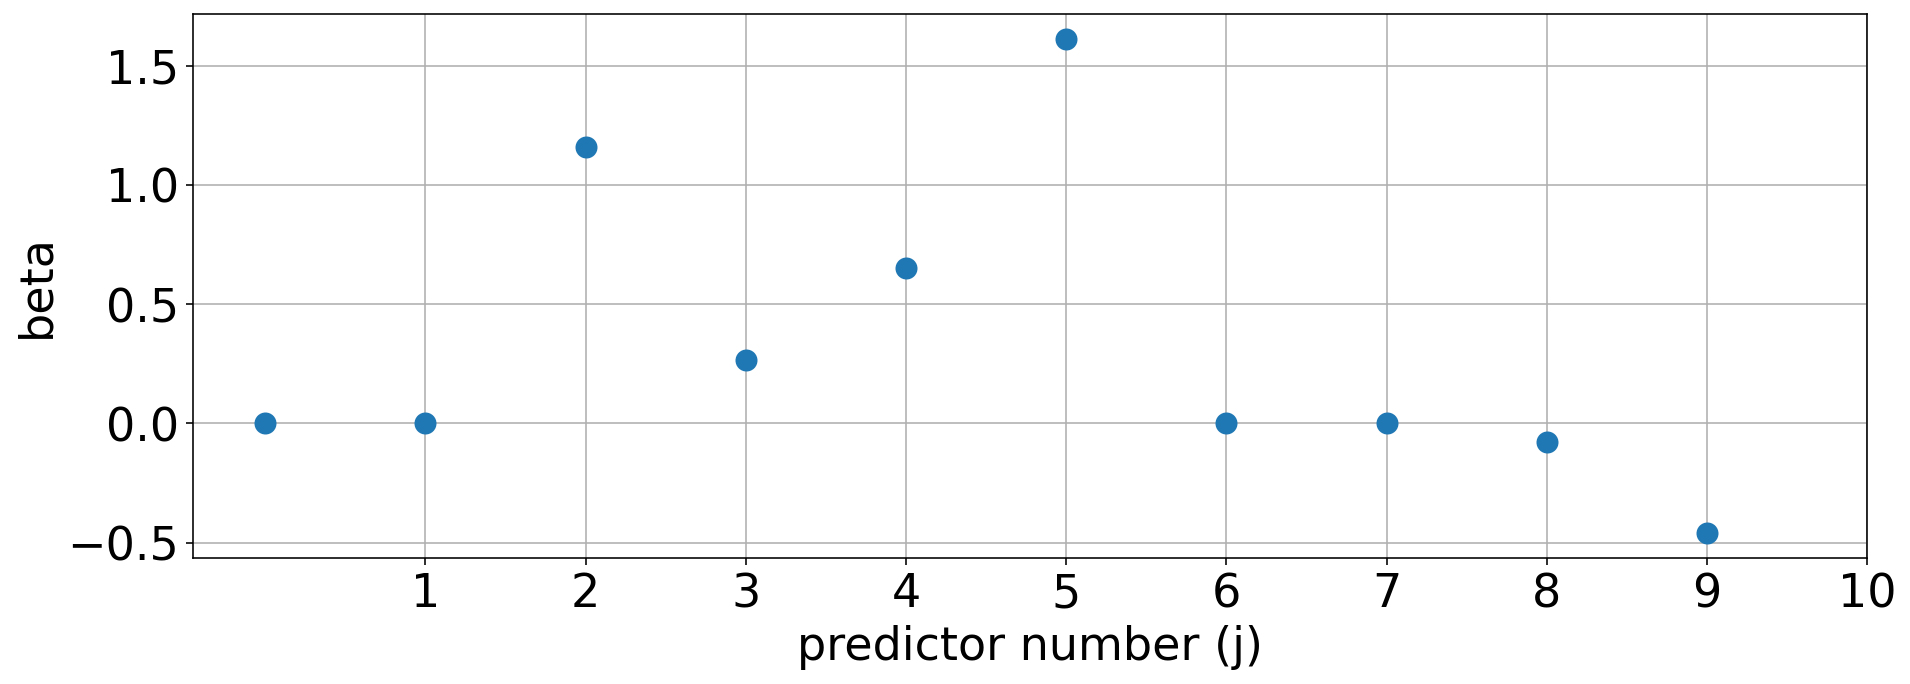

In [477]:
rreg=Lasso(alpha=0.4)
train_set=np.arange(0,40)   
X_train=Z[train_set,:]
model=rreg.fit(Z,y)
model.coef_
plt.plot(model.coef_*1.5,'o',markersize=10)
plt.xlabel('predictor number (j)')
plt.xticks(np.arange(1,11));
plt.ylabel('beta')
plt.grid()

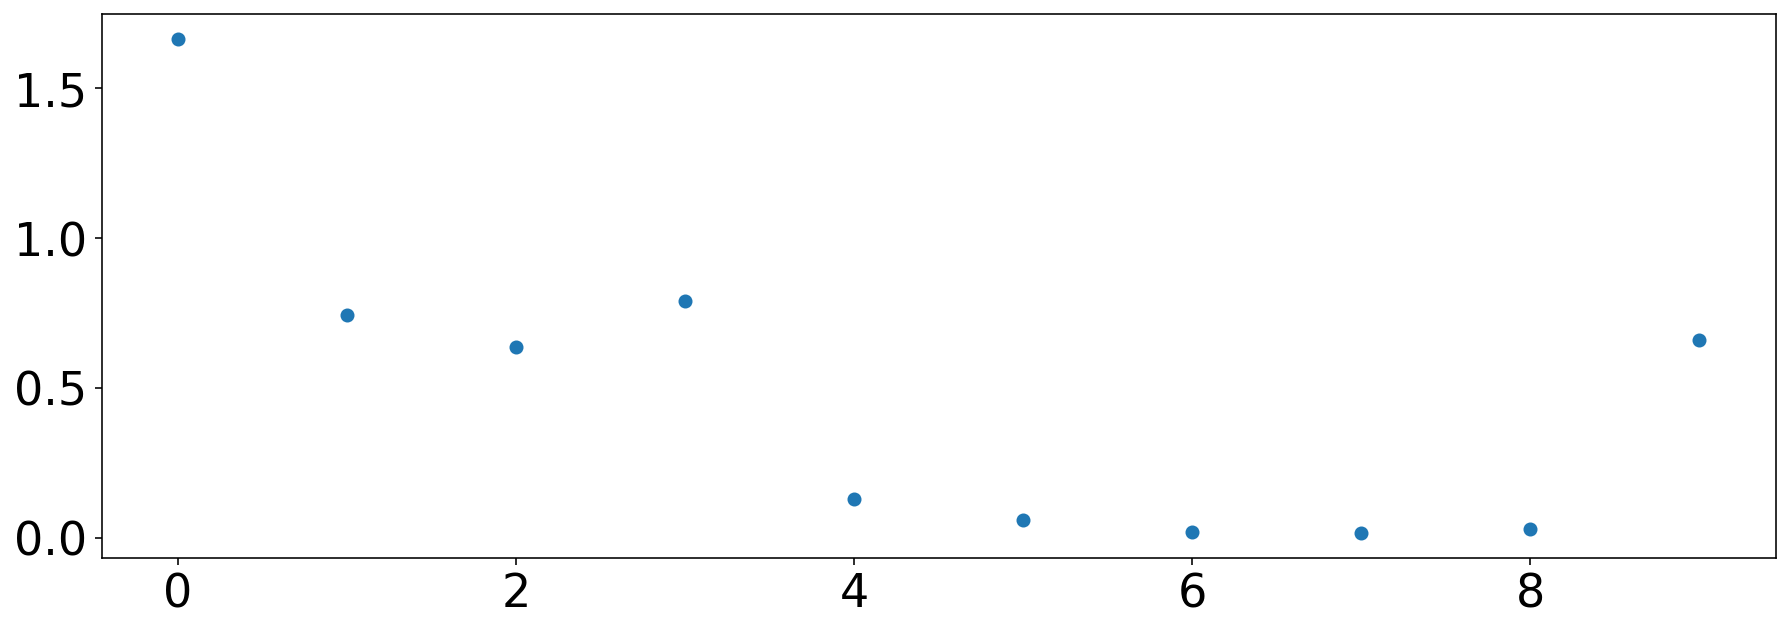

In [432]:
rreg=Ridge(alpha=0)
model=rreg.fit(Z,y)
model.coef_
plt.plot(model.coef_,'o')

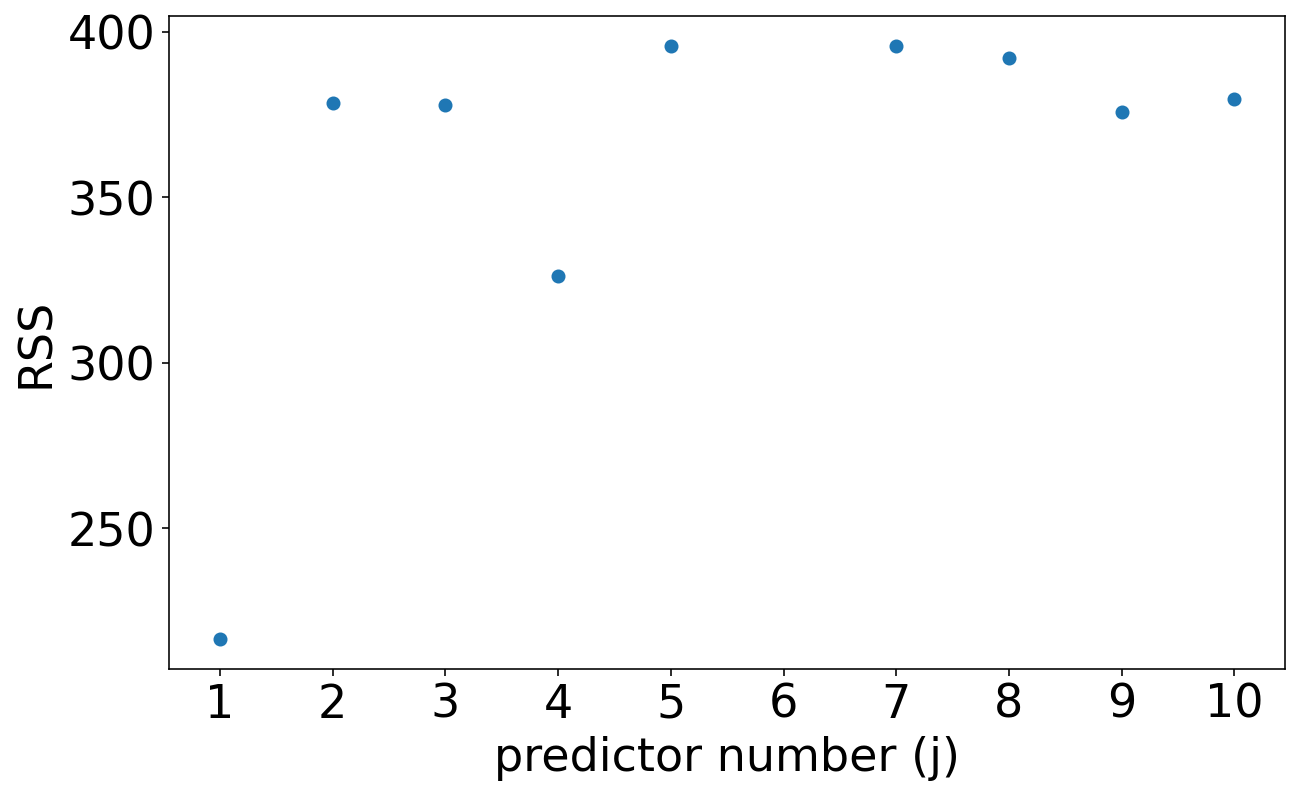

In [390]:
fig,ax=plt.subplots(1,figsize=[10,6])
v=np.asarray([0,1,2,3,4,6,7,8,9])
plt.plot(v+1,RSS[v]-80,'o')
plt.xlabel('predictor number (j)')
plt.ylabel('RSS')
plt.xticks(np.arange(1,11));

In [391]:
train_set=np.arange(0,40)
valid_set=np.arange(20,40)
test_set =np.arange(40,60)


X=Z[:,0:5]
X_train=X[train_set,:]
y_train=y[train_set]

X_test=X[test_set,:]
y_test=y[test_set]

X_valid=X[valid_set,:]
y_valid=y[valid_set]


model=LinearRegression().fit(X_train,y_train)
yhat_train=model.predict(X_train)
yhat_test =model.predict(X_test)
yhat_valid=model.predict(X_valid)

mse_train=np.sum((yhat_train-y_train)**2)/len(y_train)

mse_test =np.sum((yhat_test -y_test )**2)/len(y_test)
mse_valid=np.sum((yhat_valid-y_valid)**2)/len(y_valid)



0.5778281125669958


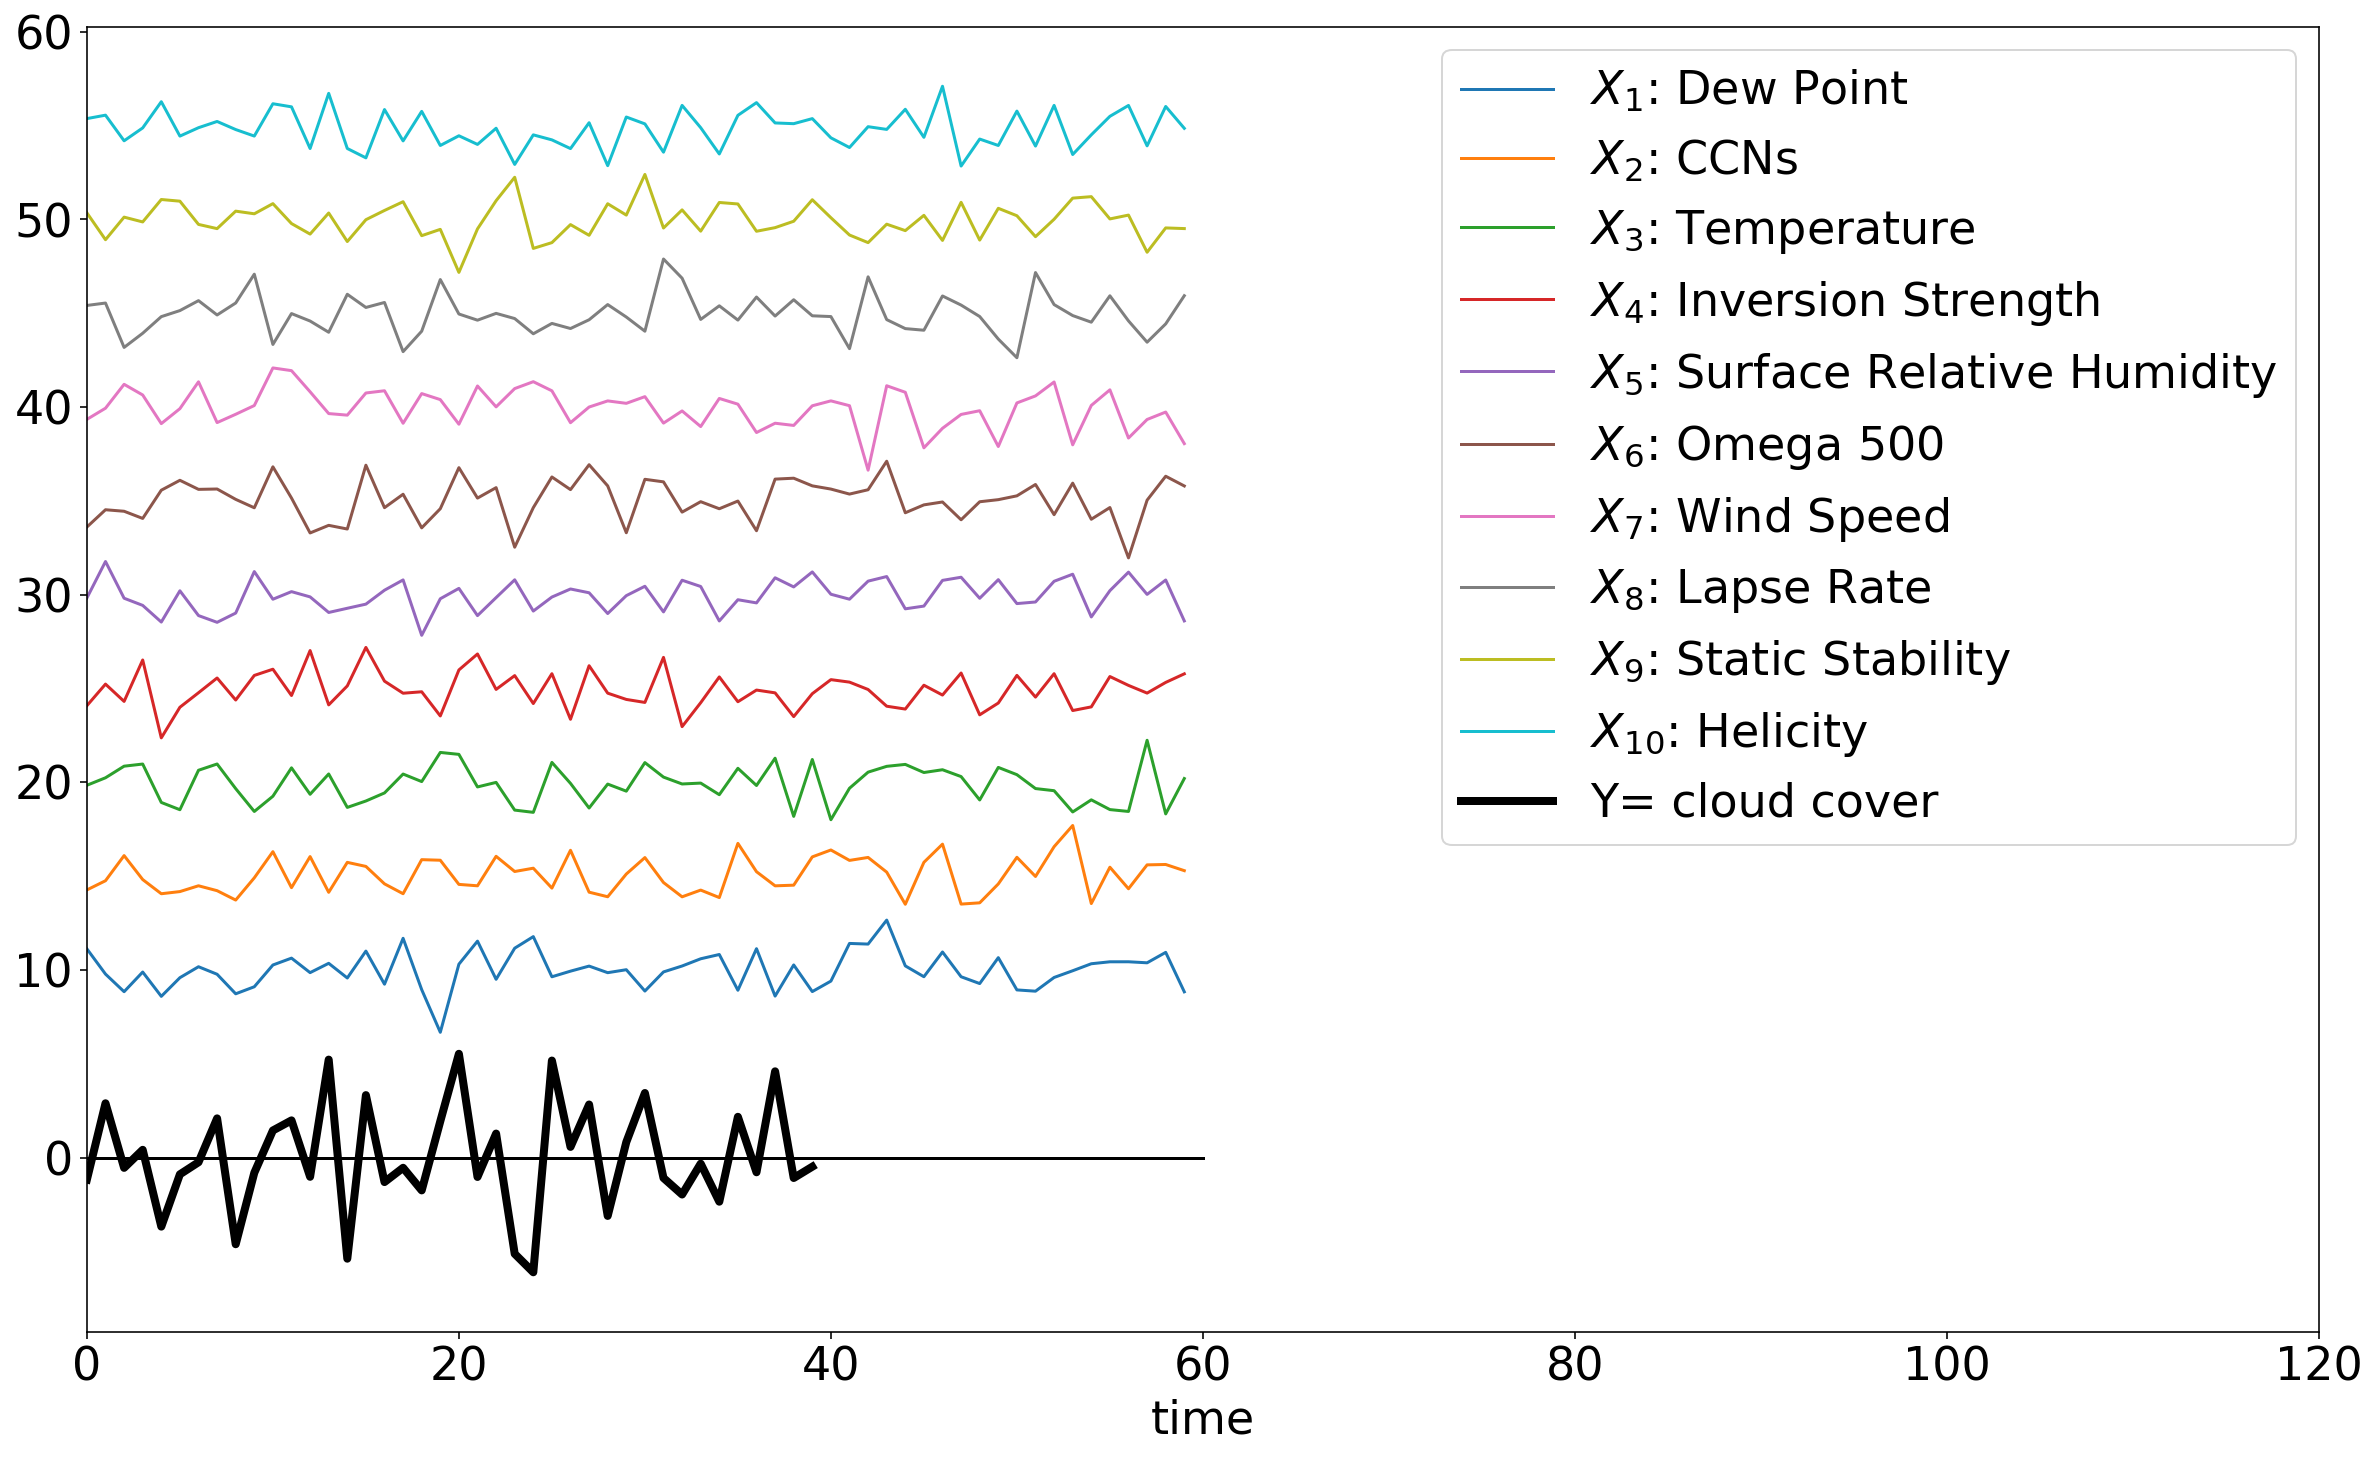

In [392]:
fig,ax=plt.subplots(1,figsize=[20,12])
K=[4,5,0,1,2,3,6,7,8,9]
for j in range(Npreds):
    plt.plot(Z[0:100,K[j]]+5*j+10,label='$X_{'+str(j+1)+'}$: '+labels[K[j]]);
    plt.xlabel('time')
    
    plt.plot([0,60],[0,0],'k');
    plt.xlabel('time')
plt.plot(y_train,'k',linewidth=4,label='Y= cloud cover')
#plt.plot(y[0:60]-e[0:60],'r',linewidth=4,label='Y= observed cloud cover')
plt.legend()   
plt.xlim([0,120])

print(np.var(e)/np.var(y))

(-7.0, 12.0)

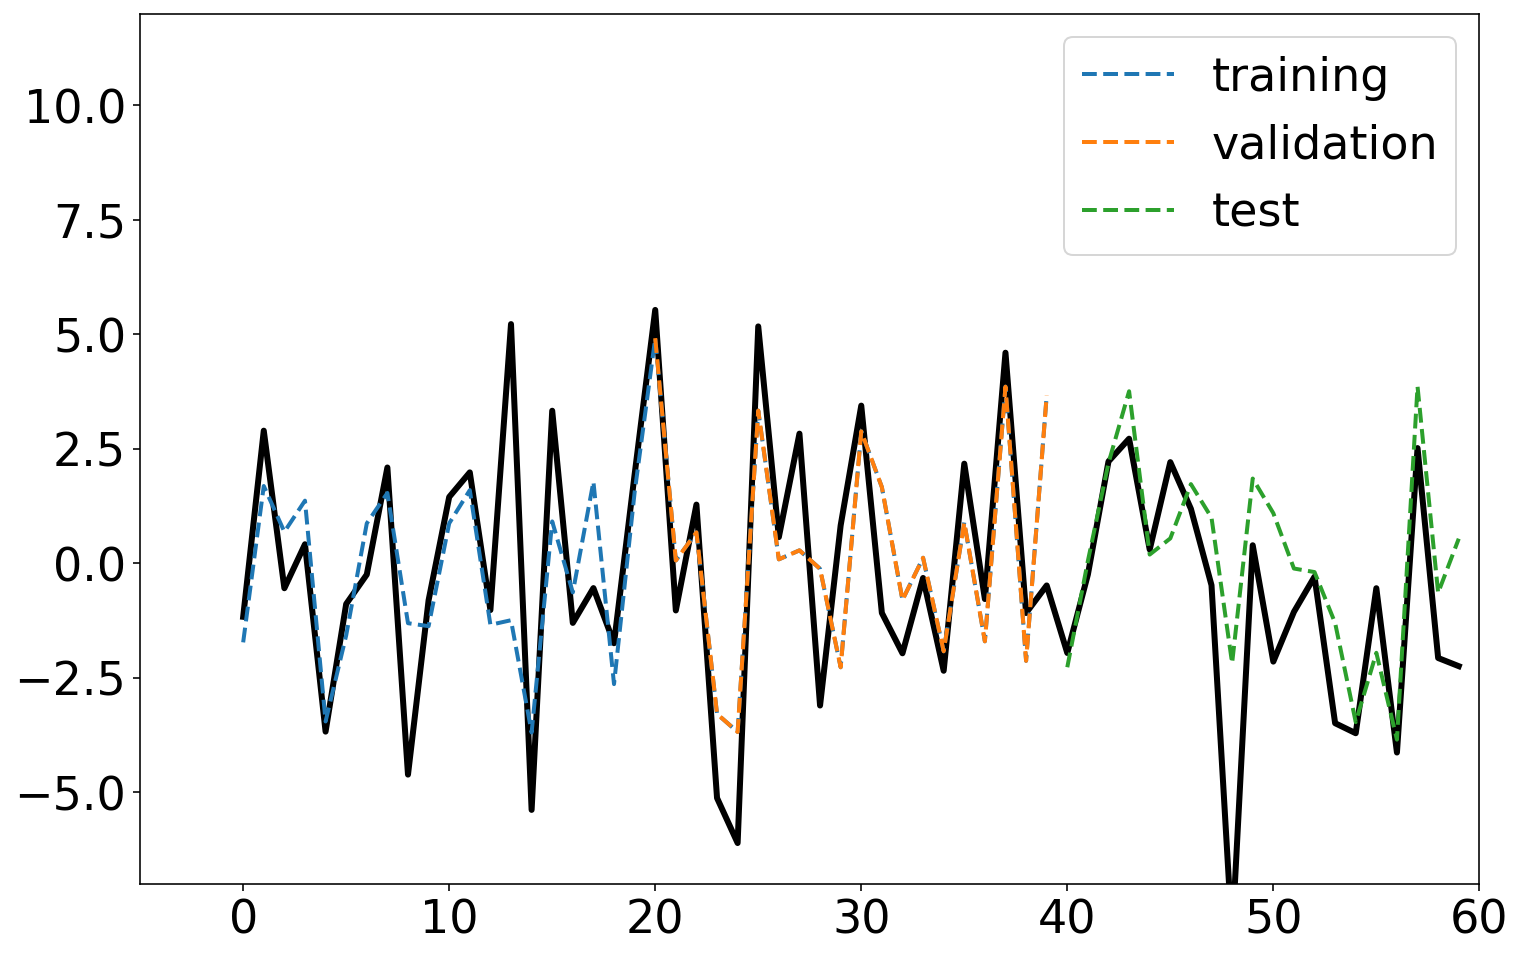

In [393]:
fig,ax=plt.subplots(1,figsize=[12,8])

plt.plot(y,'k',linewidth=3)
plt.plot(train_set,yhat_train,'--',linewidth=2,label='training')
plt.plot(valid_set,yhat_valid,'--',linewidth=2,label='validation')
plt.plot(test_set,yhat_test,'--',linewidth=2,label='test')

plt.legend()
plt.xlim(-5,60)
plt.ylim(-7,12)
#plt.text(0,-6.5,'MSE train= '+np.array2string(mse_train[2],precision=2),fontsize=20)
#plt.text(20,-6.5,'MSE test= '+np.array2string(mse_test[2],precision=2),fontsize=20)
#plt.text(37,-6.5,'MSE validation= '+np.array2string(mse_valid[2],precision=2),fontsize=20)

In [323]:
mse_train=np.empty(Npreds)
mse_test =np.empty(Npreds)
mse_valid=np.empty(Npreds)

for m in np.arange(1,Npreds):
    #sigma_e=2
    #e=stats.norm.rvs(0,sigma_e,nsize)

    #y=np.dot(Z,betas)+e

    X=Z[:,0:m]
    X_train=X[train_set,:]
    y_train=y[train_set]

    X_test=X[test_set,:]
    y_test=y[test_set]

    X_valid=X[valid_set,:]
    y_valid=y[valid_set]


    model=LinearRegression().fit(X_train,y_train)
    yhat_train=model.predict(X_train)
    yhat_test =model.predict(X_test)
    yhat_valid=model.predict(X_valid)

    mse_train[m]=np.sum((yhat_train-y_train)**2)/len(y_train)
    mse_test [m]=np.sum((yhat_test -y_test )**2)/len(y_test)
    mse_valid[m]=np.sum((yhat_valid-y_valid)**2)/len(y_valid)

    print(np.shape(X_train))
    


(40, 1)
(40, 2)
(40, 3)
(40, 4)
(40, 5)
(40, 6)
(40, 7)
(40, 8)
(40, 9)


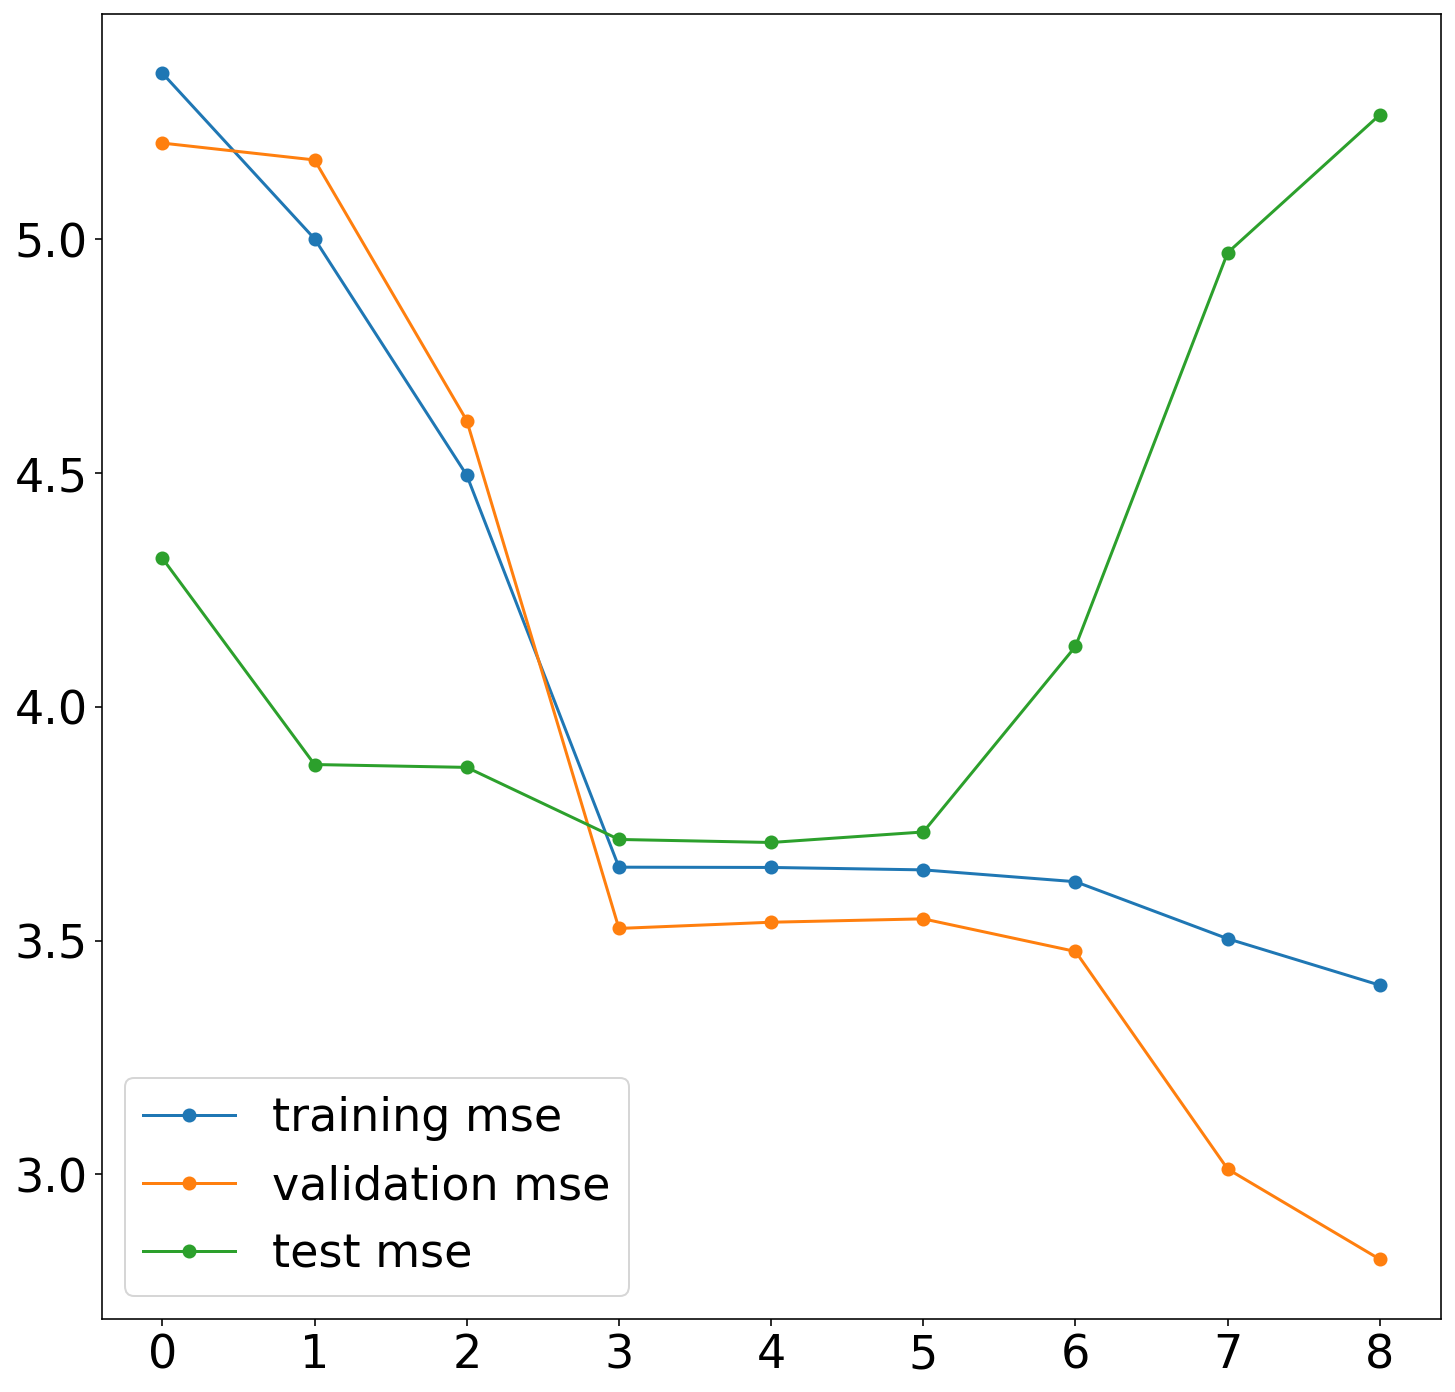

In [324]:
fig,ax=plt.subplots(1,figsize=[12,12])
plt.plot(mse_train[1:],'o-',label='training mse')
plt.plot(mse_valid[1:],'o-',label='validation mse')
plt.plot(mse_test[1:],'o-',label='test mse')

#plt.xlim(0,9)
plt.legend()
#plt.ylim(0,20)

(1.0, 6.0)

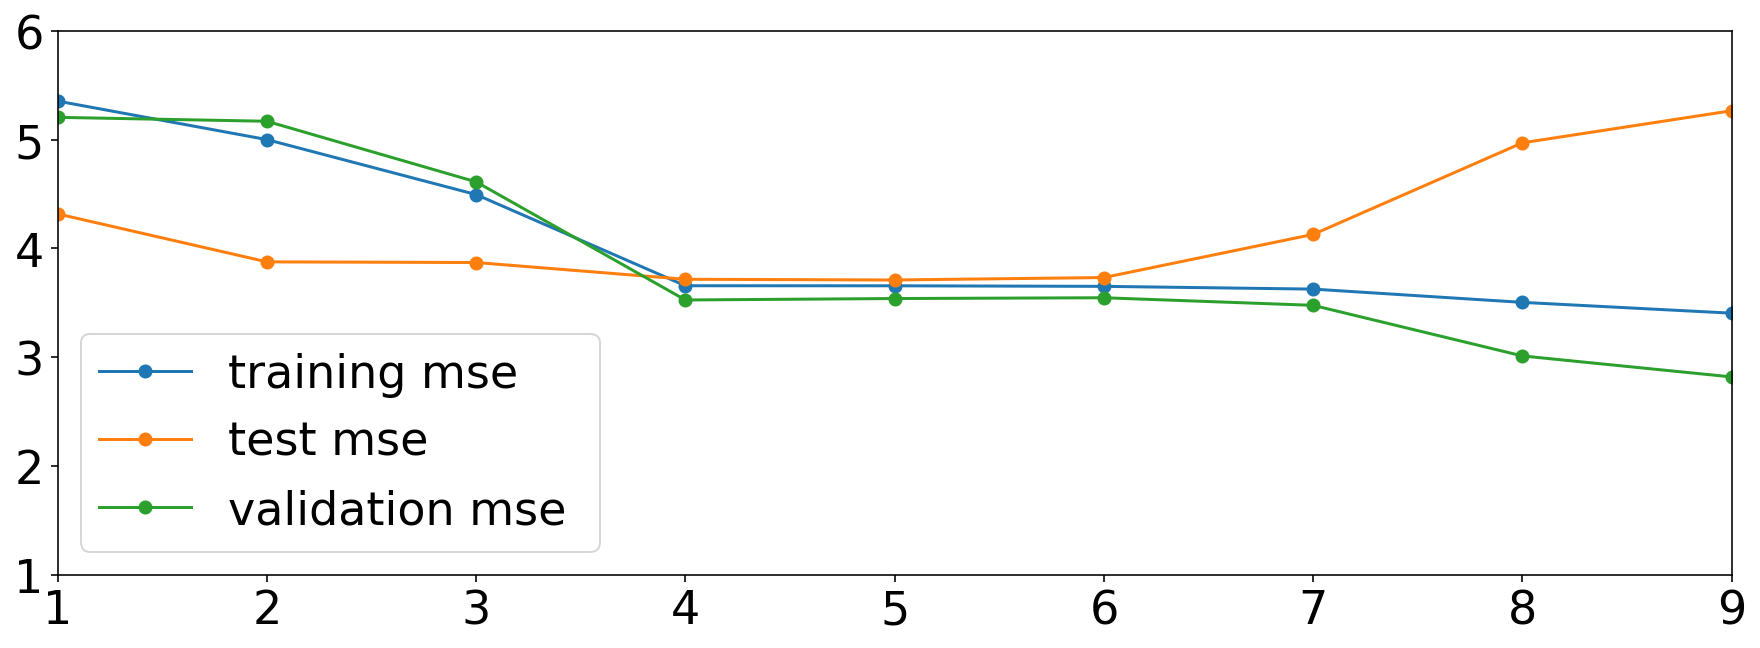

In [325]:
## fig,ax=plt.subplots(1,figsize=[12,12])
plt.plot(mse_train,'o-',label='training mse')
plt.plot(mse_test,'o-',label='test mse')
plt.plot(mse_valid,'o-',label='validation mse ')
plt.xlim(1,9)
plt.legend()
plt.ylim(1,6)

#### 

In [326]:
from sklearn.model_selection import KFold
n_splits=5

mse_train=np.zeros([Npreds,n_splits])
mse_test=np.zeros([Npreds,n_splits])
mse_valid=np.zeros([Npreds,n_splits])
for m in np.arange(1,Npreds):
    k=0
    X=Z[:,0:m]
    kf = KFold(n_splits=n_splits)
    kf.get_n_splits(X)

    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model=LinearRegression().fit(X_train,y_train)
        yhat_train=model.predict(X_train)
        yhat_test =model.predict(X_test)


        mse_train[m,k]=np.sum((yhat_train-y_train)**2)/len(y_train)
        mse_test [m,k]=np.sum((yhat_test -y_test )**2)/len(y_test)
        k=k+1
    
    

In [441]:
from sklearn.model_selection import KFold
n_splits=5

mse_train=np.zeros([Npreds,n_splits])
mse_test=np.zeros([Npreds,n_splits])
mse_valid=np.zeros([Npreds,n_splits])

alpha=np.linspace(0,0.3,Npreds)

for m in np.arange(1,Npreds):
    k=0
    X=Z
    kf = KFold(n_splits=n_splits)
    kf.get_n_splits(X)

    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        print(alpha[m])
        rreg=Lasso(alpha=alpha[m])
        model=rreg.fit(X_train,y_train)
        yhat_train=model.predict(X_train)
        yhat_test =model.predict(X_test)


        mse_train[m,k]=np.sum((yhat_train-y_train)**2)/len(y_train)
        mse_test [m,k]=np.sum((yhat_test -y_test )**2)/len(y_test)
        k=k+1
    

0.03333333333333333
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.06666666666666667
0.06666666666666667
0.06666666666666667
0.06666666666666667
0.06666666666666667
0.1
0.1
0.1
0.1
0.1
0.13333333333333333
0.13333333333333333
0.13333333333333333
0.13333333333333333
0.13333333333333333
0.16666666666666666
0.16666666666666666
0.16666666666666666
0.16666666666666666
0.16666666666666666
0.2
0.2
0.2
0.2
0.2
0.23333333333333334
0.23333333333333334
0.23333333333333334
0.23333333333333334
0.23333333333333334
0.26666666666666666
0.26666666666666666
0.26666666666666666
0.26666666666666666
0.26666666666666666
0.3
0.3
0.3
0.3
0.3


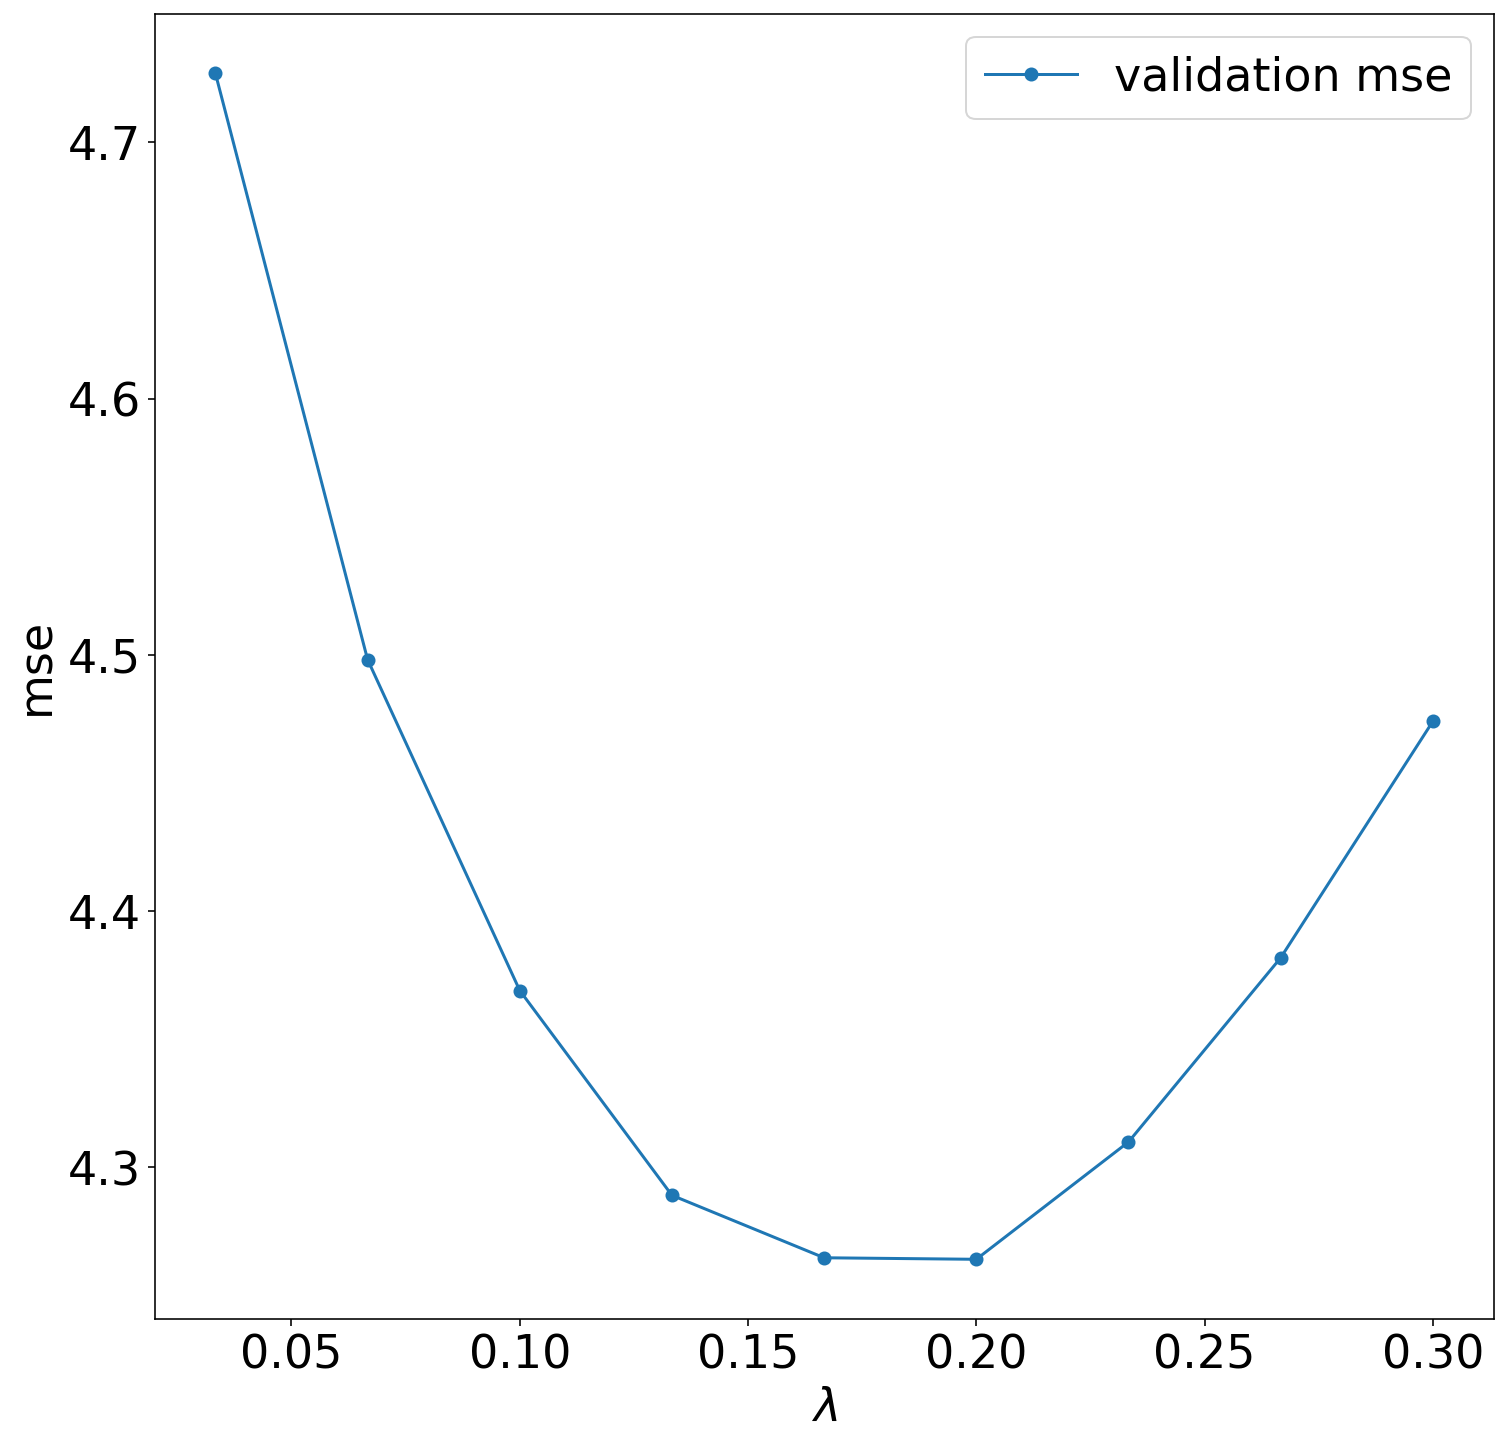

In [472]:
fig,ax=plt.subplots(1,figsize=[12,12])
#plt.plot(np.arange(1,10),np.mean(mse_train[1:],1),'o--',label='training mse')
plt.plot(alpha[1:],np.mean(mse_test[1:],1),'o-',label='validation mse')
#plt.plot(mse_test[1:],'o-',label='validation mse')
plt.ylabel('mse')
plt.xlabel('$\lambda$')
#plt.xlim(0,9)
plt.legend()
#plt.ylim(0,20)

### model=LinearRegression().fit(X_train,y_train)
    yhat_train=model.predict(X_train)
    yhat_test =model.predict(X_test)
    yhat_valid=model.predict(X_valid)

    mse_train[m]=np.sum((yhat_train-y_train)**2)/len(y_train)
    mse_test [m]=np.sum((yhat_test -y_test )**2)/len(y_test)
    mse_valid[m]=np.sum((yhat_valid-y_valid)**2)/len(y_valid)

In [406]:
ridge

NameError: name 'ridge' is not defined

In [411]:
np.shape(X_train)

(48, 10)